## Assignment 6: Grid Search and Support Vector Machines

### Stefenie Pickston
#### 1506427

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-value/housing.csv


***From previous lab/assignment...***

In [2]:
# Load Data
df = pd.read_csv(os.path.join(dirname, filename))

# Check...
print('Loaded...')

Loaded...


***Lab 6 Starts here...***

In [3]:
### Task 1. Define a function preprocess_features that takes in X as the 
#   arguments, and complete the subtasks below.  
#   You can return X either as a numpy array or as a DataFrame

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def preprocess_features(x):
    # Turn categorical variables into numeric variables. 
    le = preprocessing.LabelEncoder()
    x['ocean_proximity'] = le.fit_transform(x['ocean_proximity'])

    # Split into four categories, one hot encoding
    x['ocean_proximity_1']=(x['ocean_proximity']==1).astype(int)
    x['ocean_proximity_2']=(x['ocean_proximity']==2).astype(int)
    x['ocean_proximity_3']=(x['ocean_proximity']==3).astype(int)
    x['ocean_proximity_4']=(x['ocean_proximity']==4).astype(int)

    # delete original column
    x = x.drop('ocean_proximity',axis=1)

    # save columns
    columns = x.columns

    # Scaling the data for SGD
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # convert array back into dataframe
    x = pd.DataFrame(x, columns = columns)
    
    # return preprocessed df
    return x

In [4]:
### Task 2. Define a function run_reg that takes a regressor and X_train
#   X_test, y_train, y_test as arguments, and complete the
#   subtasks below. You can reuse run_reg from Lab 5. Note that you do
#   not need to plot the coefficient of the model. 

def run_reg(regressor, x_train, x_test, y_train, y_test):
    # train the regressor using the train data
    reg = regressor.fit(x_train, y_train)
    # compute predictions for the test data
    predicted = reg.predict(x_test)
    # set all predictions that are smaller than 15000, to 15000
    for i, d in enumerate(predicted):
        if d < 15000:
            predicted[i] = 15000
    # set all predictions that are larger than 500000, to 500000
    for i, d in enumerate(predicted):
        if d > 500000:
            predicted[i] = 500000
    #print(min(predicted))
    # compute the MAE (mean_absolute_error) for the test data
    mae = mean_absolute_error(y_test, predicted)
    # scatterplot the true test targets vs. predictions (show MAE in the plot as "title")
    plt.title(f'MAE = {mae}')
    plt.scatter(y_test, predicted)
    plt.show()
    # plot the coeffients of the model [challenge: have the names of the features as the labels to the coefficients] 
    # coef = reg.coef_
    # plt.title(f'{name} Coefficients')
    # plt.bar(x_train.columns, coef, color ='maroon',width = 0.1)
    # plt.xticks(rotation = 90)
    # plt.show()
    # return the MAE
    return mae

In [5]:
# Importing
from sklearn.model_selection import train_test_split

# Import mae libraries
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# seed
my_ID=1506427

# Replace all NULL/missing values
df = df.fillna(0)
print(df.info())
print(df.head())

# define x and y before preprocessing to not get errors with columns
x = df.iloc[:, 1:9]
y = df.iloc[:, 9]

# call preprocess on data
X = preprocess_features(x)

# train data, setting test_size = 0.9 normally it should be 0.1 but we are overfitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9, random_state=my_ID) 

# Check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.2

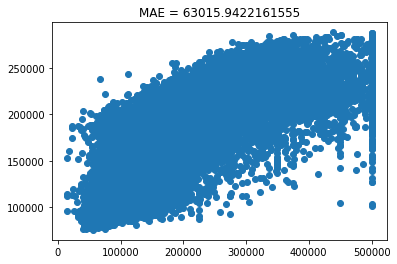

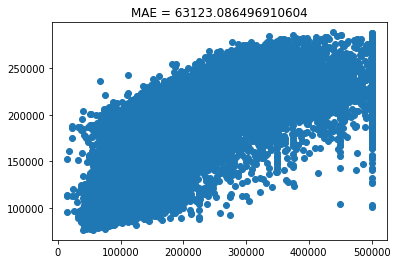

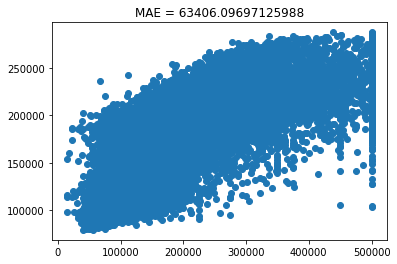

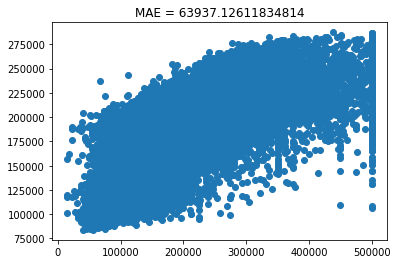

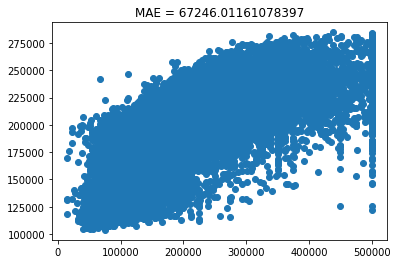

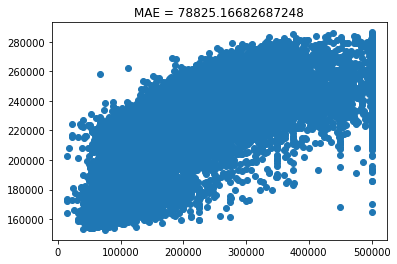

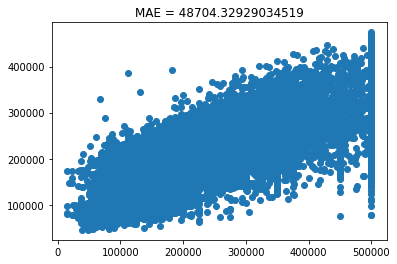

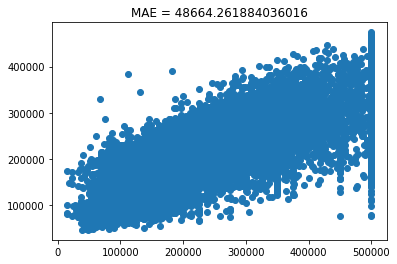

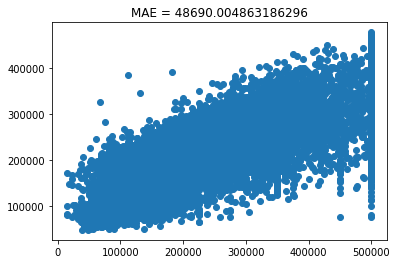

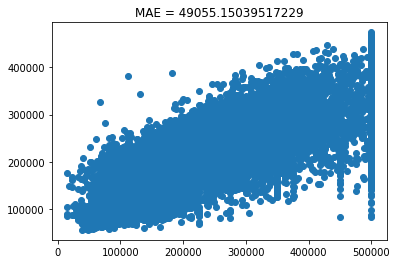

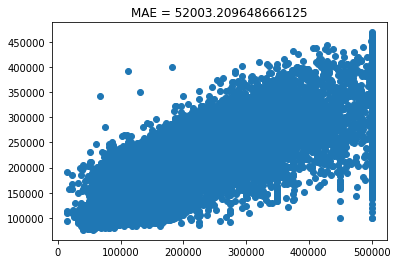

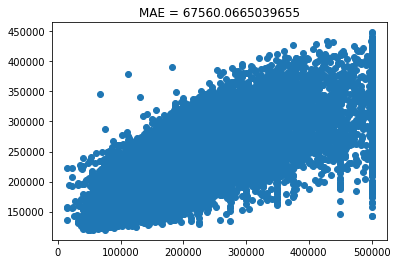

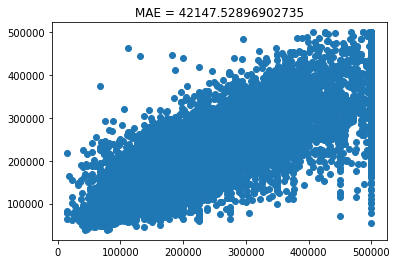

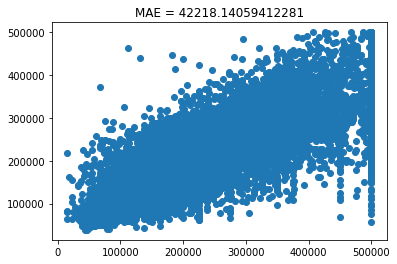

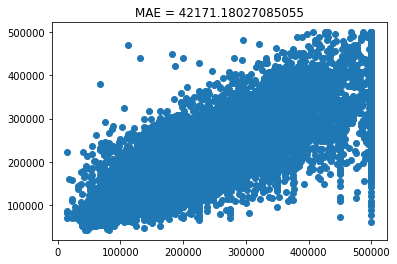

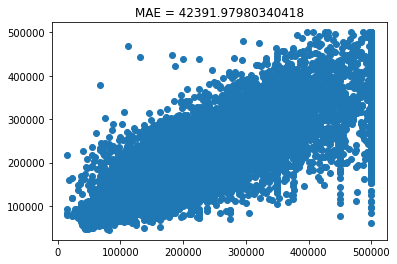

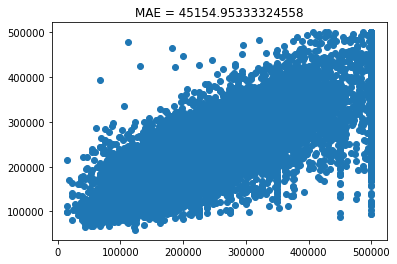

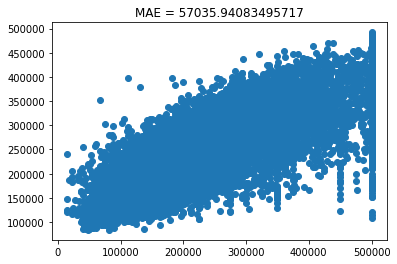

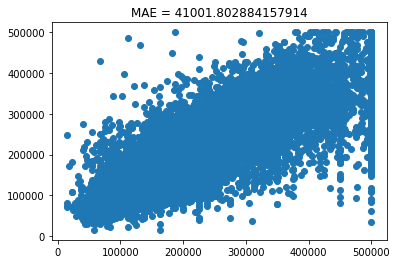

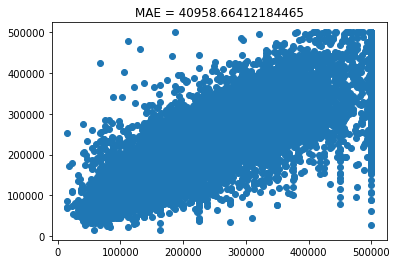

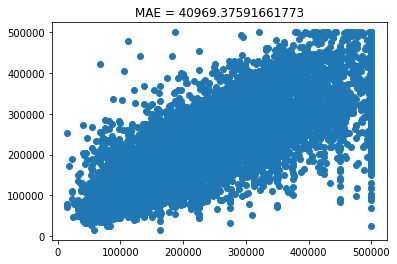

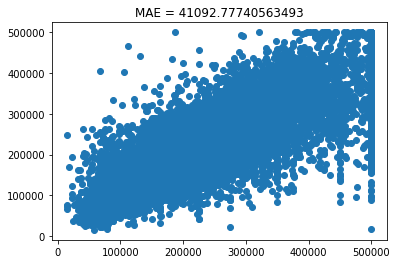

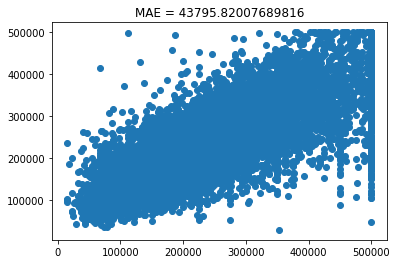

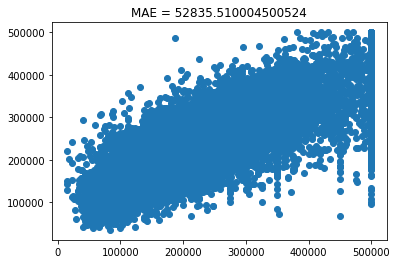

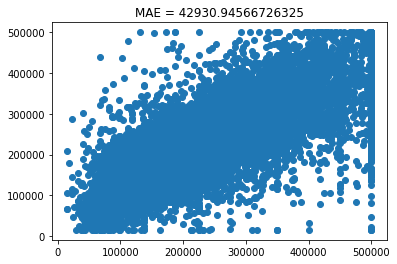

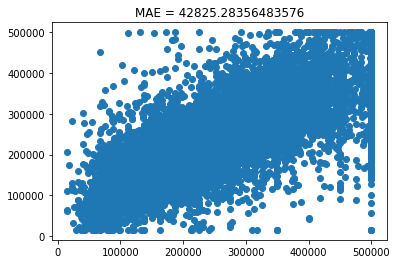

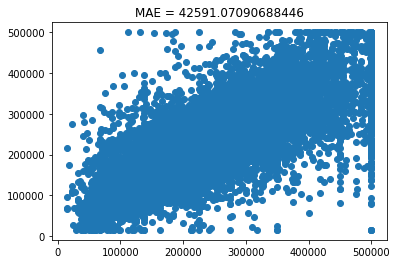

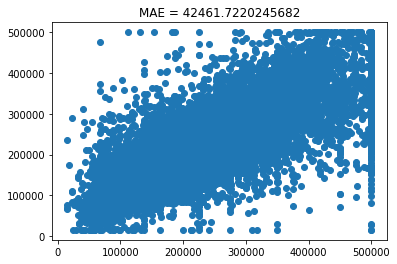

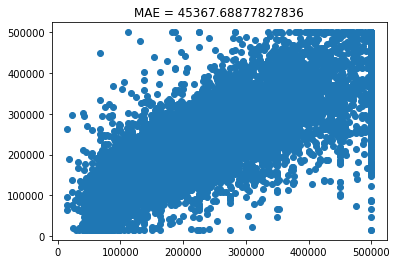

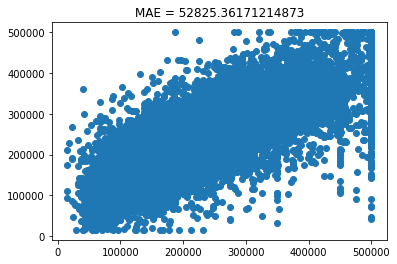

In [6]:
### Task 3: Call run_reg for all possible combinations of the following 
#   hyperparameters for the regressor. Use X_train, X_test, y_train, y_test
#   from the previous step. There should be 30 runs total, store the MAE values
#
#   Regressor: sklearn.svm.SVR
#   Kernel   : 'rbf' (Radial Basis Function)
#   Gamma    : 'scale' (note: this is the default)
#   Cost     : [1000,10000,100000,1000000,10000000]
#   Epsilon  : [2000,5000,10000,20000,50000,100000]
# array values in initialisation of the SVR parameters

# import the SVR libraries
from sklearn.svm import SVR

# define cost and epsilon arrays
cost = [1000,10000,100000,1000000,10000000]
epsilon = [2000,5000,10000,20000,50000,100000]
mae_values = []

# run through all combinations of cost and epsilon
for i in cost:
    for j in epsilon:
        svr = SVR(kernel = 'rbf', gamma = 'scale', C = i, epsilon = j)
        mae = run_reg(svr, X_train, X_test, y_train, y_test)
        mae_values.append(mae)

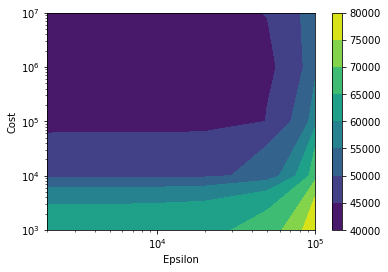

In [7]:
# reshape MAE array into 2d
mae_values = np.reshape(mae_values, (5,6));

### Task 4: visualize the MAE values for the range of Cost and Epsilon using
#   a contour plot or any other plot that would be appropriate

# Import plot libraries
import matplotlib.pyplot as plt

plt.contourf(epsilon, cost, mae_values)

# make graph
plt.yscale('log')
plt.xscale('log')
plt.colorbar()
plt.xlabel('Epsilon')
plt.ylabel('Cost')

plt.show()

In [8]:
# lowest MAE loss is:
min_mae = mae_values.min()
print(min_mae)

# finding the indicies and parameters with the lowest MAE loss
np.where(mae_values == min_mae)

40958.66412184465


(array([3]), array([1]))

In [9]:
# display a table
df = pd.DataFrame(data = mae_values, index = cost, columns = epsilon)
df

,2000,5000,10000,20000,50000,100000
1000,63015.942216,63123.086497,63406.096971,63937.126118,67246.011611,78825.166827
10000,48704.329290,48664.261884,48690.004863,49055.150395,52003.209649,67560.066504
100000,42147.528969,42218.140594,42171.180271,42391.979803,45154.953333,57035.940835
1000000,41001.802884,40958.664122,40969.375917,41092.777406,43795.820077,52835.510005
10000000,42930.945667,42825.283565,42591.070907,42461.722025,45367.688778,52825.361712


Task 5: Discuss the following questions

For what set of parameters is the MAE loss the lowest?

<i>When cost = 1,000,000 and epsilon = 5000</i>

Is this MAE loss better than the MAE loss you obtained in Lab 5?

<i>Yes. The lowest MAE loss for SVR is 40958.66412184465, which is lower than the lowest MAE loss for lab 5 (which was LinearRegression) 47340.97209487385</i>

Note any interesting observations you have on the effects the hyperparameters (cost, and epsilon)  has on the test MAE

<i>When the cost value increases, the MAE decrease to a point - around 1M before increasing again. This is similar for epsilon where the lowest point is at epsilon 2000 for cost 100k, 5000 for cost 1M, and 20000 for cost 10M - which has the shape of a diagonal line.</i>
    
<i>A low cost and higher epsilon increases loss. A higher cost and higher epsilon creates an 'O' shape. The higher the epsilon, the more the data is overfitted, the lower the cost, the more underfitting. </i>